# Programming Homework #3 SVM
붓꽃 데이터셋을 사용하여, 특성 스케일을 변경하고, Iris-Virginia 품종을 감지하기 위해 사이킷런의 선형 SVM 모델을 훈련시킵니다. 

이 때,  하이퍼파라메터 C가 1, 50, 100일 때의 산점도 그래프를 각각 출력하세요

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2,3)]                      #꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)    #Iris-Virginica면 1, 아니면 0
                                                #0: setosa / 1:virsicolor / 2:virginica

## 1) C=1

In [2]:
#PipeLine생성: for C=1을 가지는 svm
svm_clf1 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

#model fitting
svm_clf1.fit(X,y)

print(svm_clf1.named_steps["linear_svc"].coef_)        #weight벡터
print(svm_clf1.named_steps["linear_svc"].intercept_)   #bias

[[1.63338544 2.38801809]]
[-2.50530422]


$ x_2 =  {w_1 \over w_2}x_1 + {1 \over w_2}b $ 

-----
SVM 결정 직선
- w: 결정 직선의 기울기
- b: 결정 직전의 절편
- line: 결정 직선을 지나는 두 점

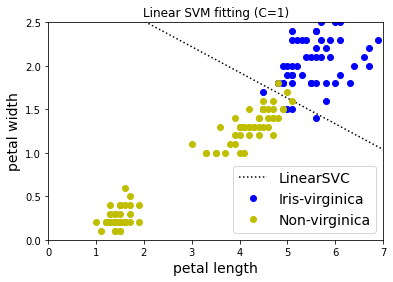

In [3]:
w = -svm_clf1.named_steps["linear_svc"].coef_[0,0]/svm_clf1.named_steps["linear_svc"].coef_[0,1]
b = -svm_clf1.named_steps["linear_svc"].intercept_[0]/svm_clf1.named_steps["linear_svc"].coef_[0,1]
line = svm_clf1.named_steps["scaler"].inverse_transform([[-5, (-5*w)+b],[5, 5*w+b]])


plt.figure()
plt.plot(line[:,0], line[:,1], "k:", label="LinearSVC")
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bo', label='Iris-virginica')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label='Non-virginica')

plt.title('Linear SVM fitting (C=1)')
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis([0, 7, 0, 2.5])
plt.show()

## 2) C=50

In [4]:
#PipeLine생성
svm_clf50 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=50, loss="hinge"))
])

#model fitting
svm_clf50.fit(X,y)

print(svm_clf50.named_steps["linear_svc"].coef_)        #weight벡터
print(svm_clf50.named_steps["linear_svc"].intercept_)   #bias

[[4.85336112 3.66729072]]
[-5.04985536]


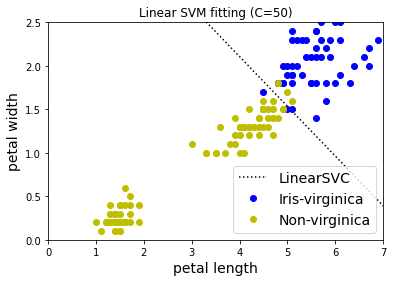

In [5]:
w = -svm_clf50.named_steps["linear_svc"].coef_[0,0]/svm_clf50.named_steps["linear_svc"].coef_[0,1]
b = -svm_clf50.named_steps["linear_svc"].intercept_[0]/svm_clf50.named_steps["linear_svc"].coef_[0,1]
line = svm_clf50.named_steps["scaler"].inverse_transform([[-5, (-5*w)+b],[5, 5*w+b]])


plt.figure()
plt.plot(line[:,0], line[:,1], "k:", label="LinearSVC")
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bo', label='Iris-virginica')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label='Non-virginica')

plt.title('Linear SVM fitting (C=50)')
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis([0, 7, 0, 2.5])
plt.show()

## 3) C=100

In [6]:
#PipeLine생성
svm_clf100 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=100, loss="hinge", max_iter=10000))
])

# ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.warnings.warn("Liblinear failed to converge, increase "
# 위와 같은 warning 발생으로 max_iter 지정해주었음

#model fitting
svm_clf100.fit(X,y)

print(svm_clf100.named_steps["linear_svc"].coef_)        #weight벡터
print(svm_clf100.named_steps["linear_svc"].intercept_)   #bias

[[6.39808913 4.83462714]]
[-6.97547769]


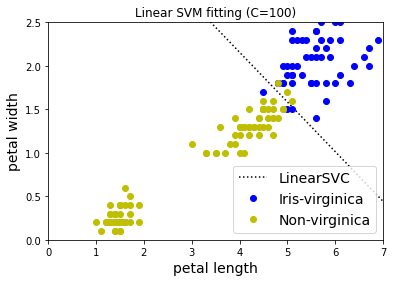

In [7]:
w = -svm_clf100.named_steps["linear_svc"].coef_[0,0]/svm_clf100.named_steps["linear_svc"].coef_[0,1]
b = -svm_clf100.named_steps["linear_svc"].intercept_[0]/svm_clf100.named_steps["linear_svc"].coef_[0,1]
line = svm_clf100.named_steps["scaler"].inverse_transform([[-5, (-5*w)+b],[5, 5*w+b]])


plt.figure()
plt.plot(line[:,0], line[:,1], "k:", label="LinearSVC")
plt.plot(X[:,0][y==1], X[:,1][y==1], 'bo', label='Iris-virginica')
plt.plot(X[:,0][y==0], X[:,1][y==0], 'yo', label='Non-virginica')


plt.title('Linear SVM fitting (C=100)')
plt.xlabel("petal length", fontsize=14)
plt.ylabel("petal width", fontsize=14)
plt.legend(loc='lower right', fontsize=14)
plt.axis([0, 7, 0, 2.5])
plt.show()